## Project title : Analyzing Amazon Sales data

In [58]:
# importing necesaary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# getting the full filepath 
file_path = '/Users/sm/Documents/received/UNI PG/internship_UM/Project 1/Amazon Sales data.csv'

# Load the dataset
data = pd.read_csv(file_path)

In [20]:
# Displaying the number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 100
Number of columns: 16


In [14]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


#### About the dataset
The dataset contains detailed records of sales transactions from various global regions, including specifics such as region, country, item type, sales channel (online or offline), order priority, order date, ship date, units sold, unit price, unit cost, total revenue, total cost, and total profit. Each row represents a unique transaction, providing comprehensive insights into sales performance and profitability across different product categories and geographical locations.

In [19]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

                Order Date      Order ID            Ship Date   Units Sold  \
count                  100  1.000000e+02                  100   100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  2013-10-09 22:48:00  5128.710000   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   124.000000   
25%    2012-02-14 12:00:00  3.389225e+08  2012-02-24 18:00:00  2836.250000   
50%    2013-07-12 12:00:00  5.577086e+08  2013-08-11 12:00:00  5382.500000   
75%    2015-04-07 00:00:00  7.907551e+08  2015-04-28 00:00:00  7369.000000   
max    2017-05-22 00:00:00  9.940222e+08  2017-06-17 00:00:00  9925.000000   
std                    NaN  2.606153e+08                  NaN  2794.484562   

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit  \
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02   
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05   
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e

In [21]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
 14  Order Year      100 n

#### Summary and Information about the dataset
The dataset consists of 100 sales transactions, including detailed information on region, country, item type, sales channel, order priority, order date, order ID, ship date, units sold, unit price, unit cost, total revenue, total cost, and total profit. The data spans from February 2, 2010, to May 22, 2017. The average number of units sold per transaction is 5,128.71, with an average unit price of 276.76 dollars and an average unit cost of 191.05 dollars. The average total revenue per transaction is approximately 1.37 million dollars, the average total cost is about 931,806 dollars, and the average total profit is around 441,682 dollars. The data also includes calculated fields for order year and order month. 

In [16]:
data.isnull().sum()  # Checking for missing values

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [15]:
# Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [22]:
# Extract month and year from order dates
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


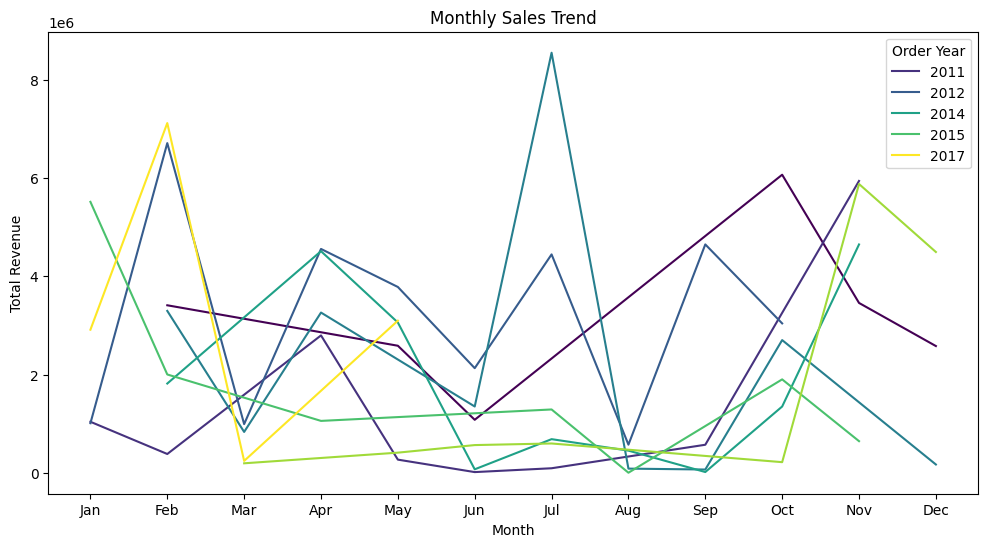

In [23]:
# Yearly-Monthly sales trend
monthly_sales = data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Total Revenue', hue='Order Year', data=monthly_sales, palette='viridis')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

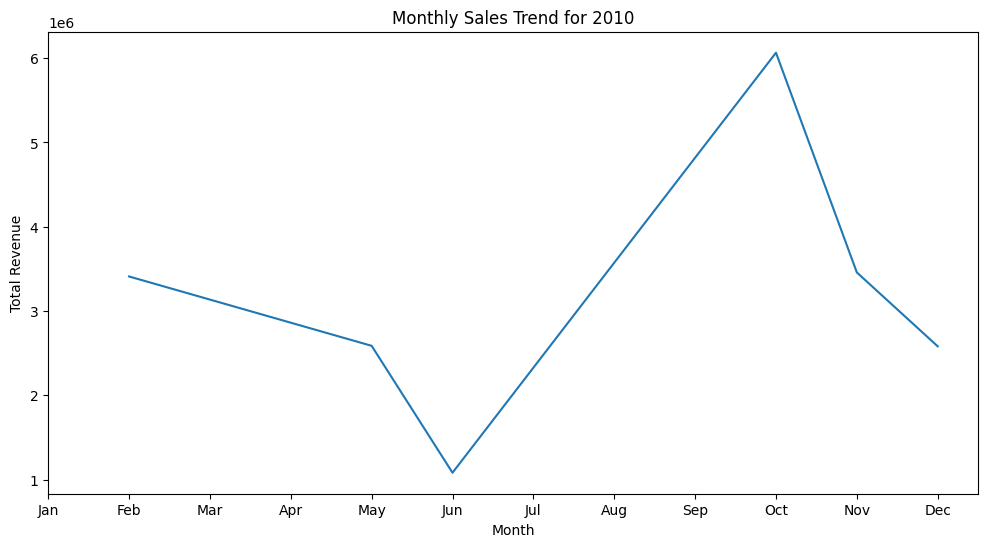

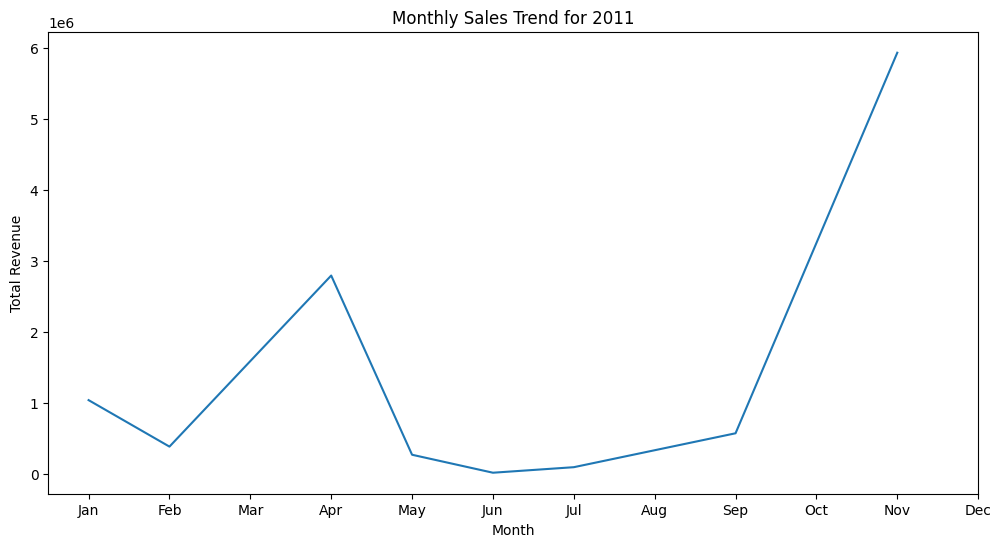

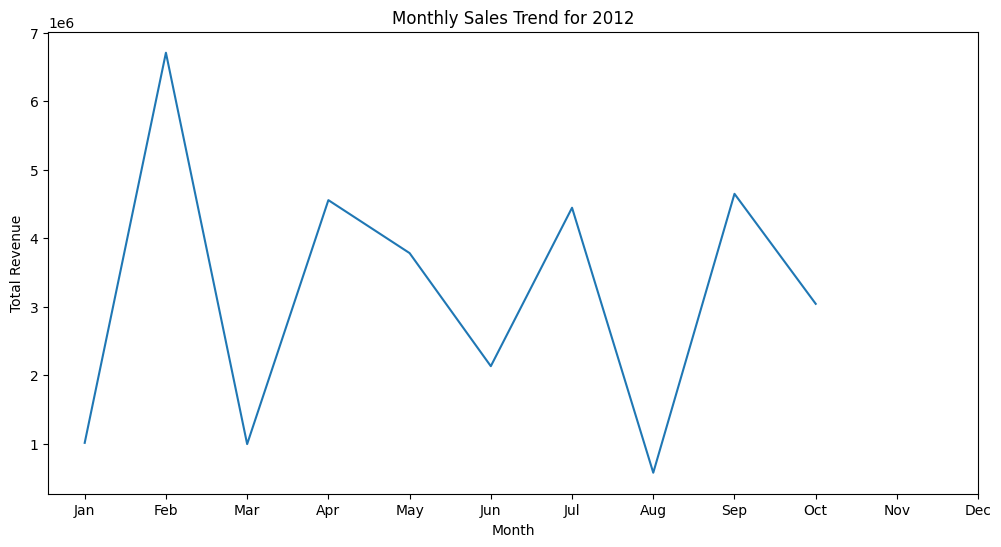

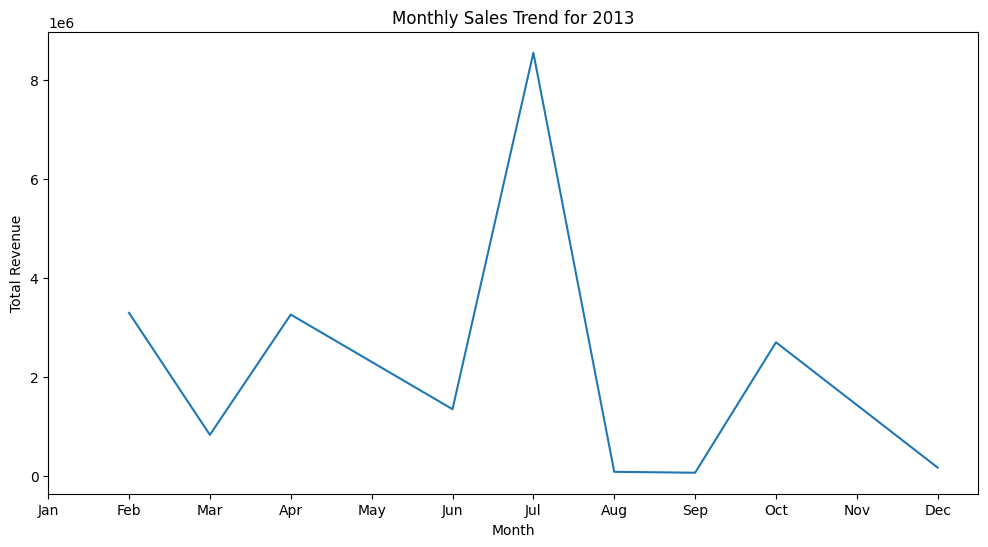

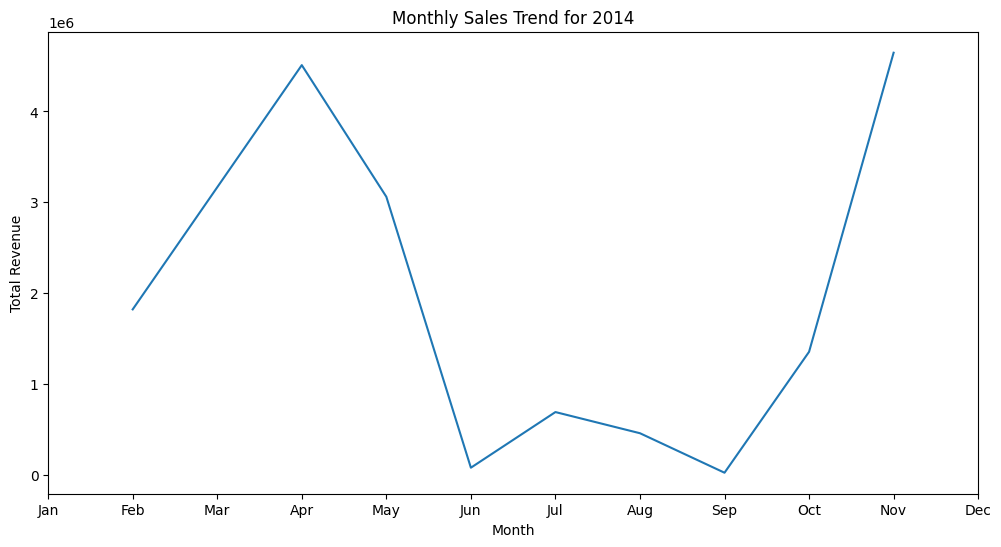

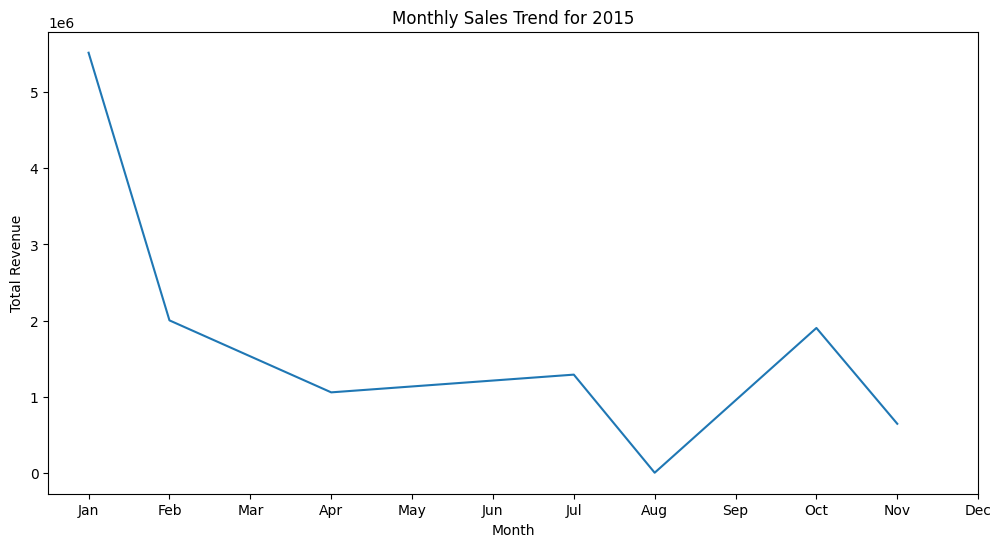

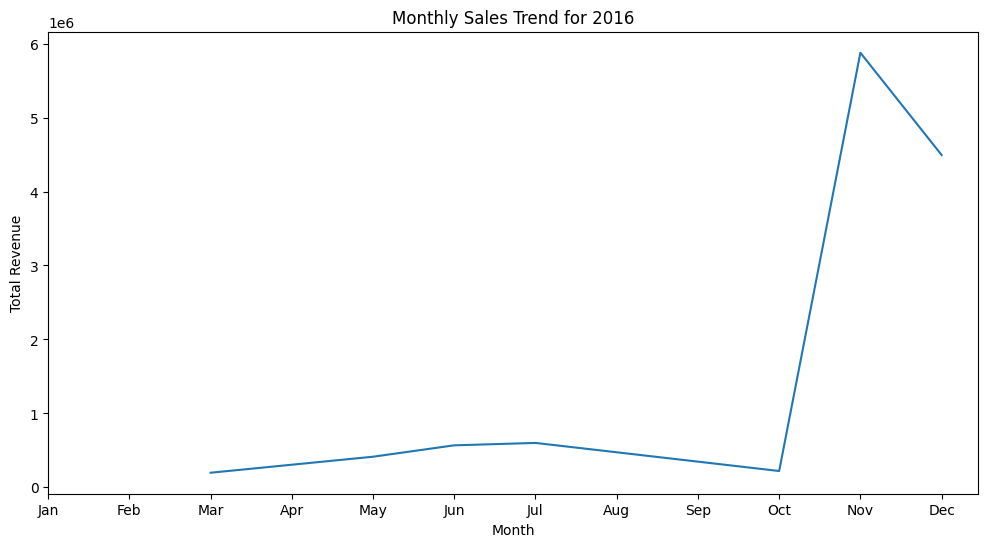

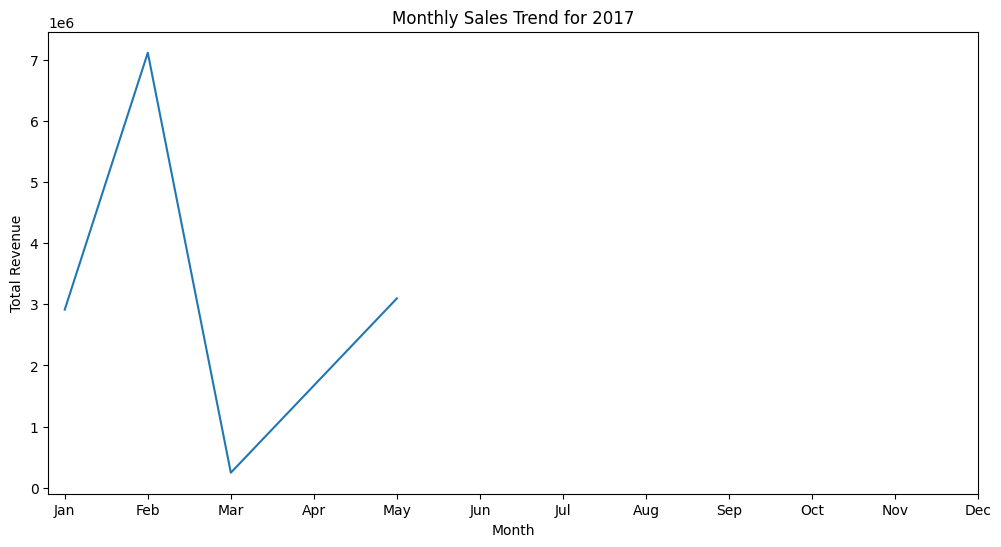

In [25]:
# Plotting separate graphs for each year
unique_years = monthly_sales['Order Year'].unique()

for year in unique_years:
    plt.figure(figsize=(12, 6))
    year_data = monthly_sales[monthly_sales['Order Year'] == year]
    sns.lineplot(x='Order Month', y='Total Revenue', data=year_data)
    plt.title(f'Monthly Sales Trend for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

To analyze the monthly sales trends over different years, separate line plots were created for each year. These plots illustrate the monthly total revenue for each year from 2010 to 2017. Key observations include:

- **2010**: The highest sales occurred in October.
- **2011**: November saw the peak sales.
- **2012**: February recorded the highest sales.
- **2013**: July was the peak month for sales.
- **2014**: November had the highest sales, with a close second in April.
- **2015**: January marked the highest point, but there was a significant decline in sales throughout the year.
- **2016**: Sales were consistently low until a notable jump in November.
- **2017**: February had the highest sales, followed by a steep decline in March and a slight recovery in April.

These observations highlight the variability in peak sales months across different years and indicate significant fluctuations in monthly sales trends.

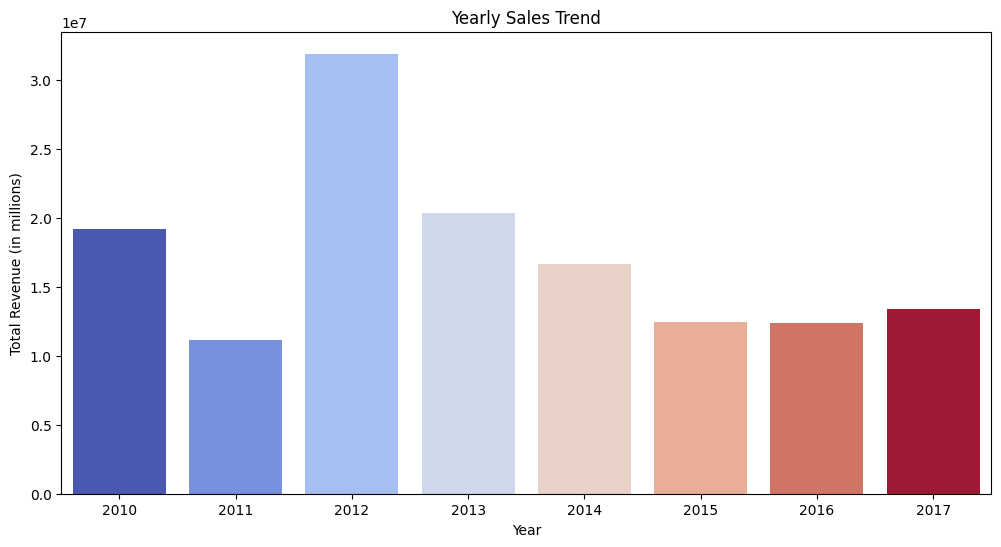

In [30]:
# Yearly sales trend
yearly_sales = data.groupby('Order Year')['Total Revenue'].sum().reset_index()

# Plotting yearly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Year', y='Total Revenue', hue='Order Year', data=yearly_sales, palette='coolwarm', dodge=False, legend=False)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.show()

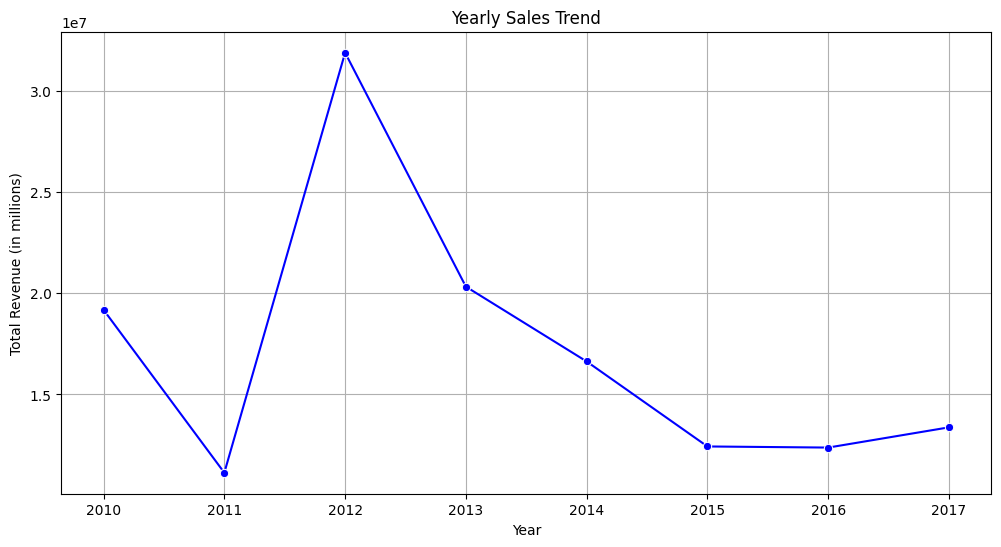

In [29]:
# Plotting yearly sales trend with a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Year', y='Total Revenue', data=yearly_sales, marker='o', color='b')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()


The yearly sales trend was analyzed by aggregating the total revenue for each year and visualizing the results using both a bar chart and a line plot. The key insights from the yearly sales trend are:

- **2012**: This year recorded the highest total revenue.
- **2011**: With a steep decline from 2010, the lowest total revenue was observed in this year.
- **2013-2015**: There was a general decline in total revenue over these years.
- **2017**: A slight improvement in total revenue was noted compared to the previous year, marking a positive shift.

This analysis highlights the peak sales year of 2012 and the overall declining trend in revenue up until 2016, followed by a minor recovery in 2017.

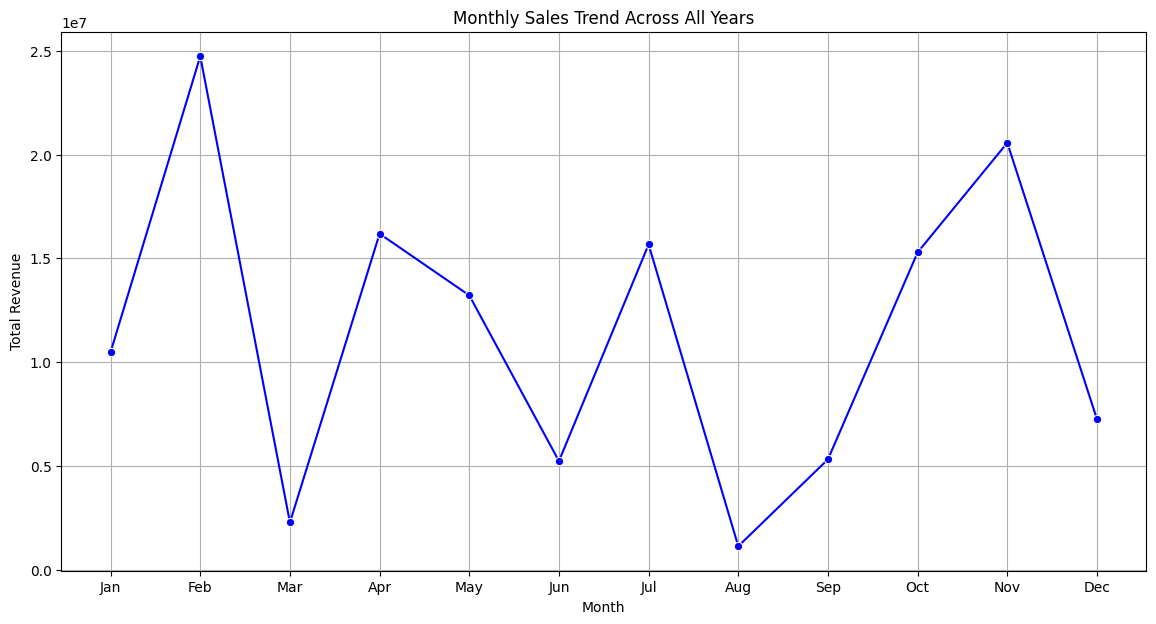

In [35]:
# Aggregate data to get monthly total revenue across all years
monthly_sales = data.groupby('Order Month')['Total Revenue'].sum().reset_index()

# Plotting the monthly sales trend across all years
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Month', y='Total Revenue', data=monthly_sales, color='b', marker='o')
plt.title('Monthly Sales Trend Across All Years')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The monthly sales trend across all years reveals fluctuations in total revenue by month. Key highlights include:

- **February**: Highest total revenue.
- **October**: Second-highest revenue.
- **July**: Another peak in revenue.

The analysis shows significant variability in monthly sales, with notable declines in March, August and December.

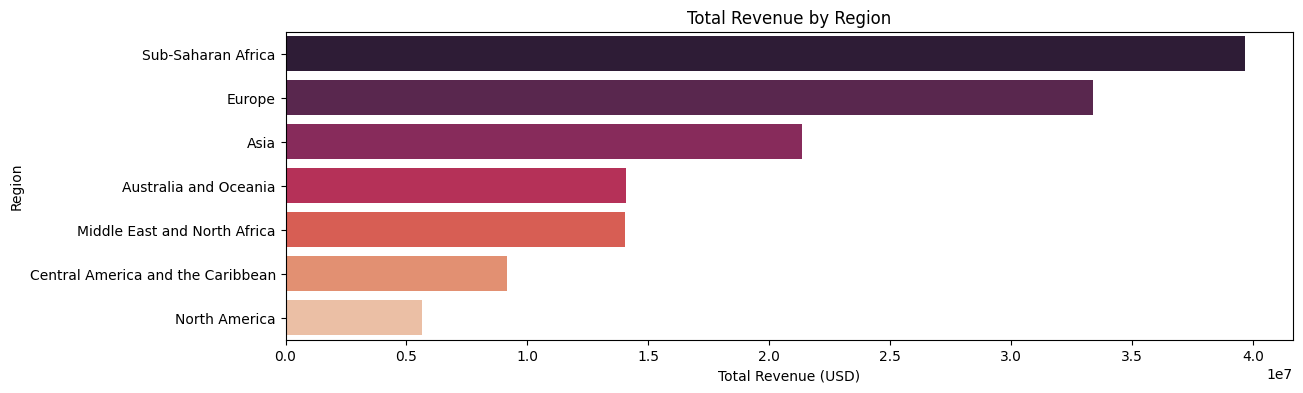

In [76]:
# Sales distribution by region
region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(13, 4))
sns.barplot(x='Total Revenue', y='Region', hue='Region', data=region_sales, dodge=False, palette='rocket', legend=False)
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Region')
plt.grid(False)  # Remove grid lines
plt.show()


The total revenue distribution across different regions reveals:

- **Sub-Saharan Africa**: The highest total revenue.
- **Europe**: Second-highest total revenue.
- **Asia**: Third in total revenue.

Other regions such as Australia and Oceania, the Middle East and North Africa, Central America and the Caribbean, and North America follow in descending order. This analysis highlights the significant revenue contributions from Sub-Saharan Africa and Europe.

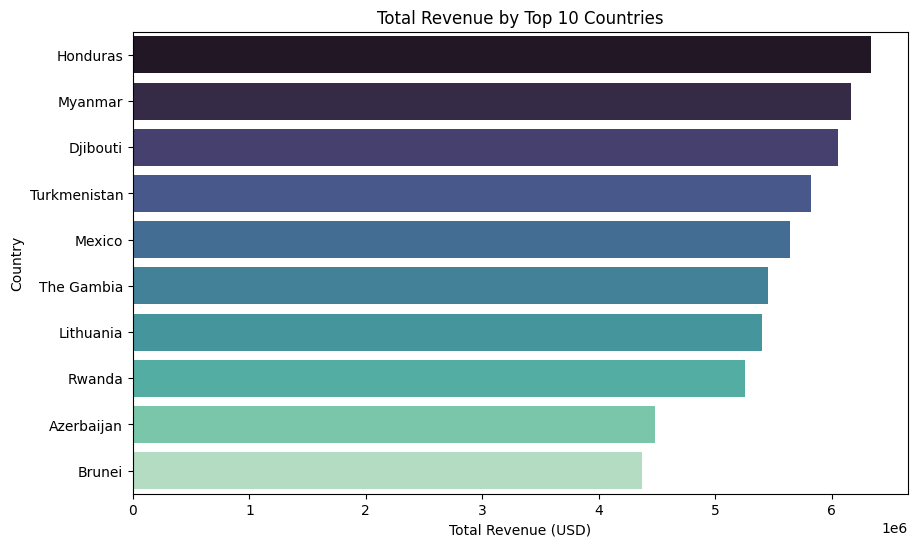

In [44]:
# Sales distribution by top countries
top_countries = data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Revenue', y='Country', hue='Country', data=top_countries, dodge=False, palette='mako', legend=False)
plt.title('Total Revenue by Top 10 Countries')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Country')
plt.grid(False)
plt.show()


The chart illustrates the total revenue distribution across the top 10 countries:

- **Honduras**: Highest total revenue.
- **Myanmar**: Second highest total revenue.
- **Djibouti**: Third in total revenue.

Other countries in the top 10 include Turkmenistan, Mexico, The Gambia, Lithuania, Rwanda, Azerbaijan, and Brunei. This analysis showcases Honduras as the leading country in terms of total revenue.

In [49]:
# Key metrics and factors

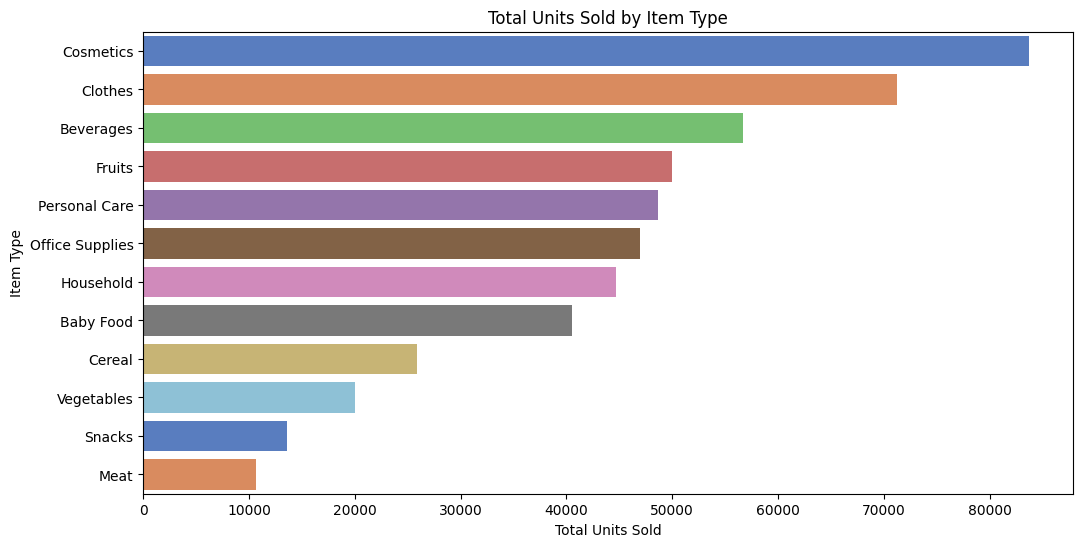

In [57]:
# Total Units Sold by Item Type
item_sales = data.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Units Sold', y='Item Type', data=item_sales, palette='muted', hue='Item Type', dodge=False)
plt.title('Total Units Sold by Item Type')
plt.xlabel('Total Units Sold')
plt.ylabel('Item Type')
plt.grid(False)
plt.show()

The chart illustrates the total units sold distribution across different item types:

- **Cosmetics**: Highest total units sold.
- **Clothes**: Second highest total units sold.
- **Beverages**: Third in total units sold.
- Other item types in descending order include Fruits, Personal Care, Office Supplies, Household, Baby Foods, Cereals, Vegetables, Snacks, and Meat.

This analysis showcases cosmetics as the leading item type in terms of total units sold.

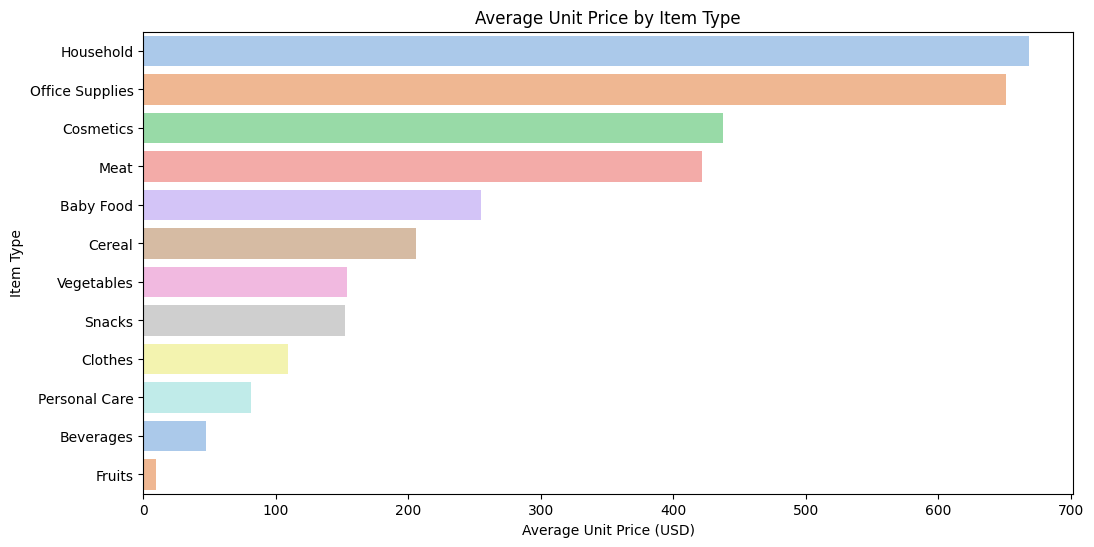

In [64]:
# Average Unit Price by Item Type
avg_unit_price = data.groupby('Item Type')['Unit Price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Unit Price', y='Item Type', data=avg_unit_price, palette='pastel', hue='Item Type', dodge=False)
plt.title('Average Unit Price by Item Type')
plt.xlabel('Average Unit Price (USD)')
plt.ylabel('Item Type')
plt.grid(False)
plt.show()

The chart illustrates the total units sold distribution across different item types:

- **Cosmetics**: Highest total units sold.
- **Clothes**: Second highest total units sold.
- **Beverages**: Third in total units sold.
- Other item types in descending order include Fruits, Personal Care, Office Supplies, Household, Baby Foods, Cereals, Vegetables, Snacks, and Meat.

This analysis showcases cosmetics as the leading item type in terms of total units sold.

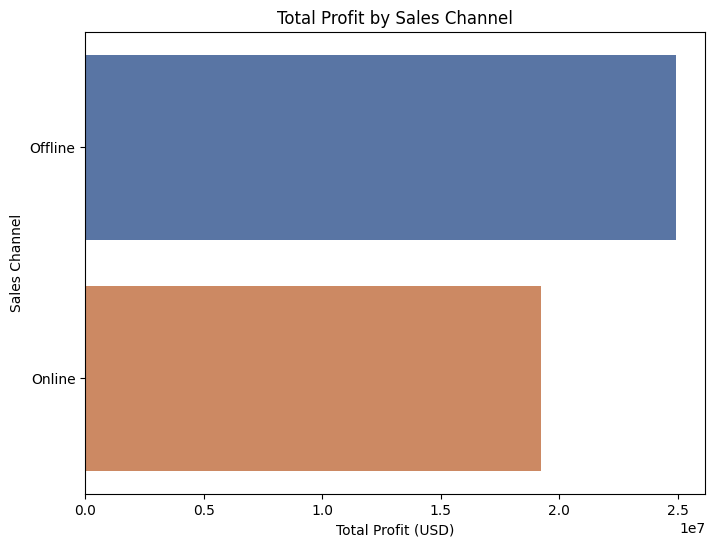

In [63]:
# Total Profit by Sales Channel
sales_channel_profit = data.groupby('Sales Channel')['Total Profit'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Total Profit', y='Sales Channel', data=sales_channel_profit, palette='deep', hue='Sales Channel', dodge=False)
plt.title('Total Profit by Sales Channel')
plt.xlabel('Total Profit (USD)')
plt.ylabel('Sales Channel')
plt.grid(False)
plt.show()

The chart illustrates the total profit distribution across different sales channels:

- **Offline Sales Channel**:
  - Generated higher total profit compared to the online sales channel.
  - Indicates a significant contribution to overall profitability through traditional methods, including telephone orders, physical store purchases, and other non-internet sales activities.

- **Online Sales Channel**:
  - Although typically dominant in e-commerce, the total profit from this channel is lower than offline.
  - Represents profits from transactions made via Amazon's website or mobile app.

This analysis highlights that, contrary to expectations, the offline sales channel has yielded greater total profit than the online channel, suggesting the importance of diversified sales strategies.

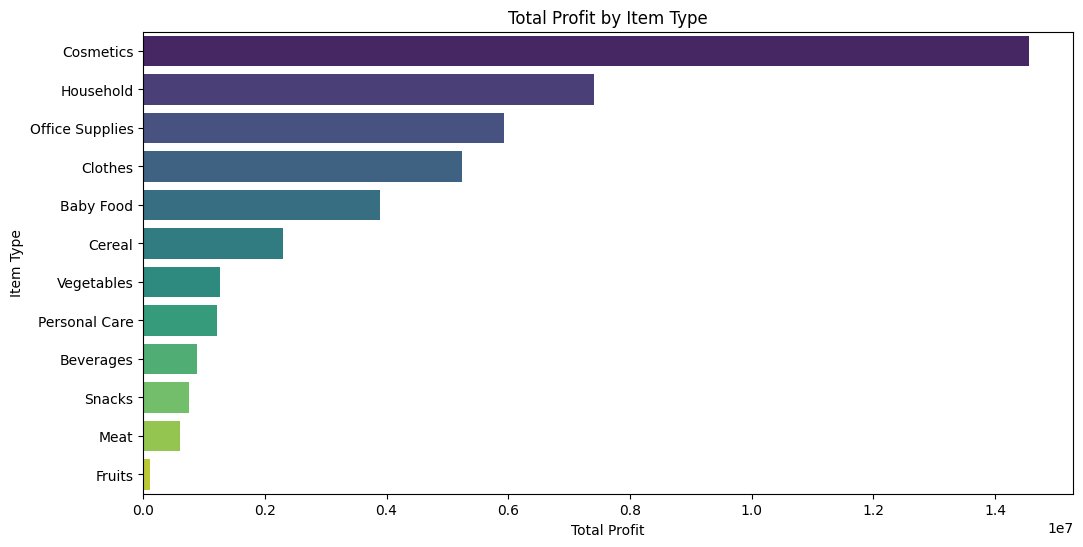

In [68]:
# Aggregate total profit by item type
profit_by_item_type = data.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).reset_index()

# Plot total profit by item type
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Profit', y='Item Type', data=profit_by_item_type, palette='viridis', hue='Item Type', dodge=False, legend=False)
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.grid(False)
plt.show()

The chart illustrates the total profit generated by different item types in descending order. Cosmetics lead with the highest total profit, followed by household items, which, while second, are significantly lower in profit compared to cosmetics. The subsequent items, including office supplies, clothes, baby food, cereal, vegetables, personal care, beverages, snacks, meat, and fruits, show relatively minor differences in profit margins. This analysis highlights cosmetics as the top profit-generating item type, with a substantial margin over household items, and the remaining categories having comparable profit levels.

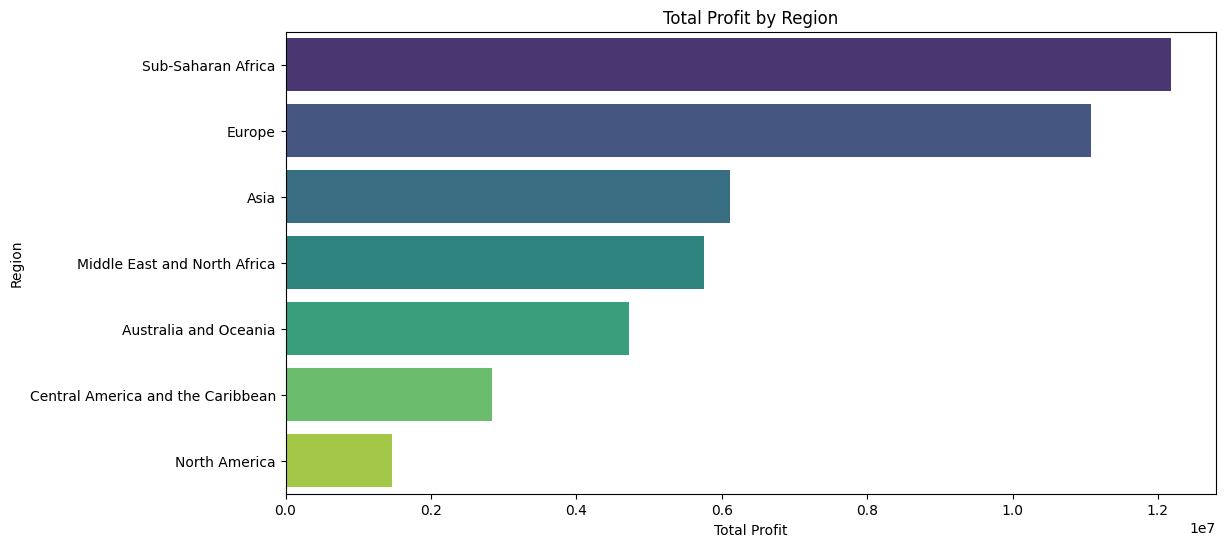

In [73]:
# Aggregate total profit by region
profit_by_region = data.groupby('Region')['Total Profit'].sum().sort_values(ascending=False).reset_index()

# Plot total profit by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Profit', y='Region', data=profit_by_region, hue = 'Region', palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.grid(False)
plt.show()

The chart displays the total profit by region in descending order. Sub-Saharan Africa and Europe lead with the highest total profits. There is a significant drop to the next group, which includes Asia, followed by the Middle East and North Africa. Further down are Australia and Oceania, Central America and the Caribbean, with North America generating the lowest total profit. This analysis underscores the dominance of Sub-Saharan Africa and Europe in terms of profitability, with a notable gap between these regions and the others.